# Assignment 2

In this assignment, you'll be exploring solving equations using different numerical methods.

Name: Alice Gee, Mohammad Aga, Andrew Yang

eid: ag67642, mba929, ay6764

## Exercise 2.57

In this problem you will demonstrate that all of your root finding codes work. At the beginning of this chapter we proposed the equation solving problem

$$ 3 \sin(x) + 9 = x^2 - \cos(x) $$

Write a script that calls upon your Bisection, Regula Falsi, Newton, and Secant methods one at a time to find the positive solution to this equation. Your script needs to output the solutions in a clear and readable way so you can tell which answer can from which root finding algorithm.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as rd
import math
# Step 1: Complete the lambda function to model the equation above. We'll use it in the functions below!
f = lambda x: x**2 - np.cos(x) - 3*np.sin(x) - 9

# Step 2: Complete the methods below
def bisection(f, a, b, tol):
    """An implementation of the Bisection method for finding roots of a function.
    
    Arguments:
        f: the lambda function for the function we want to find the roots for
        a: lower bound
        b: upper bound
        tol: the tolerance
        
    Returns:
        An estimate for the root of the function.
    """
    mid = (a + b) / 2
    new_y = f(mid)
    while (abs(new_y) > tol):
        mid = (a + b) / 2
        new_y = f(mid)
        if (new_y > 0):
            b = mid
        elif (new_y < 0):
            a = mid
        else:
            return mid
    return(mid)


def Regula_Falsi (f, a, b, tol):
    """An implementation of the Regula-Falsi method for finding roots of a function.
    
    Arguments:
        f: the lambda function for the function we want to find the roots for
        a: lower bound
        b: upper bound
        tol: the tolerance
        
    Returns:
        An estimate for the root of the function.
    """
    m = (f(b) - f(a)) / (b - a)
    c = (-f(a)/m) + a
    while (abs(f(c)) > tol):
        if (f(b)*f(c) < 0):
            a = c
        elif (f(a)*f(c) < 0):
            b = c
        elif f(c) == 0:
            return (f(c))
        m = (f(b) - f(a)) / (b - a)
        c = (-f(a)/m) + a
 
    return (c)

def newton(f, f_prime, x, tol):
    """An implementation of the Netwon-Raphson method for finding roots of a differentiable function.
    
    Arguments:
        f: the lambda function for the differentiable function we want to find the roots for
        f_prime: hand-calculated derivative of f
        x: initial approximation for the root
        tol: the tolerance
        
    Returns:
        An estimate for the root of the function.
    """
    while (abs(f(x)) > tol):
        x = x - (f(x)/f_prime(x)) 
    return (float(x))

def secant(f, a, b, tol):
    """An implementation of the Secant method for finding roots of a differentiable function.
    
    Arguments:
        f: the lambda function for the differentiable function we want to find the roots for
        a: close lower approximation for the root
        b: initial approximation for the root
        tol: the tolerance
        
    Returns:
        An estimate for the root of the function.
    """
    f_prime = (f(b)-f(a)) / (b-a)
    c = b - (f(b)/f_prime)
    while abs(f(c)) > tol:
        f_prime = (f(b)-f(a)) / (b-a)
        c = b - (f(b)/f_prime)
        a = b
        b = c
    return(c)

# Step 4: Set the values below and ensure your values are correct!
tol = 1e-6
a = 0 
b = 5 
f_prime = lambda x: 2*x + np.sin(x) - 3*np.cos(x)
x = 2 

print("bisection", bisection(f, a, b, tol))
print("Regula_Falsi", Regula_Falsi(f, a, b, tol))
print("newton", newton(f, f_prime, x, tol))
print("secant", secant(f, a, b, tol))

bisection 2.9374872148036957
Regula_Falsi 2.9374872051251546
newton 2.9374872051080065
secant 2.937487205200684


## Exercise 2.60

There are MANY other root finding techniques beyond the four that we have studied thus far. We can build these methods using Taylor Series as follows:

Near $x=0$ the function $f(x)$ is approximated by the Taylor Series 

$$f(x) \approx y = f(x_0) + \sum_{n=1}^N \frac{f^{(n)}(x_0)}{n!} (x-x_0)^n$$

where $N$ is a positive integer. In a root-finding algorithm we set $y$ to zero to find the root of the approximation function. The root of this function should be close to the actual root that we’re looking for. Therefore, to find the next iterate we solve the equation

$$0 = f(x_0) + \sum_{n=1}^N \frac{f^{(n)}(x_0)}{n!} (x-x_0)^n$$

for $x$. For example, if $N=1$, then we need to solve $0=f(x_0)(x-x_0)$ for $x$. In doing so, we get $x=x_0-\frac{f(x_0)}{f'(x_0)}$. This is exactly Newton's Method. If $N=2$, then we need to solve:

$$0 = f(x_0) + f'(x_0)(x-x_0) + \frac{f''(x_0)}{2!}(x-x_0)^2$$

for $x$.

### a)

Solve for $x$ in the case that $N = 2$. Then write a Python function that implements this root-finding method.

In [2]:
def newtown_n2(f, f_prime, f_double_prime, x, tol):
    """An implementation of the 'double' Netwon-Raphson method for finding roots of a differentiable function.
    
    Arguments:
        f: the lambda function for the differentiable function we want to find the roots for
        f_prime: hand-calculated derivative of f
        f_double_prime: hand-calculated derivative of f
        x: initial approximation for the root
        tol: the tolerance
        
    Returns:
        An estimate for the root of the function.
    """
    x = (-f_prime(x) + math.sqrt((f_prime(x))**2 -2*(f(x))*(f_double_prime(x))) + f_double_prime(x)* x) / f_double_prime(x)
    while abs(f(x)) > tol:
        x = (-f_prime(x) + math.sqrt((f_prime(x))**2 -2*(f(x))*(f_double_prime(x))) + f_double_prime(x)* x) / f_double_prime(x)
    return(x)

# Make sure to complete the following
f = lambda x: x**2 - np.cos(x) - 3*np.sin(x) - 9
f_prime = lambda x: 2*x + np.sin(x) - 3*np.cos(x)
f_double_prime = lambda x: 3*np.sin(x) + np.cos(x) + 2
x = 1
tol=1e-6

print("2.60a)", newtown_n2(f, f_prime, f_double_prime, x, tol))

2.60a) 2.9374872051078644


### b)

Demonstrate that your code from part (a) is indeed working by solving several problems where you know the exact solution.

In [36]:
"""
Provide several test functions where you know the root and 
call the newtown_n2() method to test your solution.
Print the results in a readable format.
""" 

# Example #1
g = lambda x: x ** 2
g_prime = lambda x: 2*x
g_double_prime = lambda x: 2
x = 2
tol=1e-6
print("g(x)=x^2; ", newtown_n2(g, g_prime, g_double_prime, x, tol))

# Example #2
x = 3
h = lambda x: np.sin(x) + x**2 - 2 * np.log(x) - 5
h_prime = lambda x: 2*x + np.cos(x) - 2/x
h_double_prime = lambda x: -np.sin(x) + 2 + 2/x**2
tol=1e-6
print("h(x)=sin(x)+x^2-2log(x)-5; ", newtown_n2(h, h_prime, h_double_prime, x, tol))

# Example #3
x = 3
j = lambda x: x**2 - 2*x
j_prime = lambda x: 2*x - 2
j_double_prime = lambda x: 2
tol=1e-6
print("j(x)=x^2-2x; ", newtown_n2(j, j_prime, j_double_prime, x, tol))

# Example #4
x = 2
k = lambda x: x**3 - 2*x**2 - 2
k_prime = lambda x: 3*x**2 - 4*x
k_double_prime = lambda x: 6*x - 4
tol=1e-6
print("k(x)=x^3-2x^2-2; ", newtown_n2(k, k_prime, k_double_prime, x, tol))

# Example #5
x = 2
l = lambda x: x**4 - x**3 - x**2 - x
l_prime = lambda x: 4*x**3 - 3*x**2 - 2*x - 1
l_double_prime = lambda x: 12*x**2 - 6*x - 2
tol=1e-6
print("l(x)=x^4 - x^3 - x^2 - x; ", newtown_n2(l, l_prime, l_double_prime, x, tol))

# Example #6
x = 1
m = lambda x: x**8 + x**7 - 8*x**6 + 9*np.sin(x)
m_prime = lambda x: 8*x**7 + 7*x**6 - 48*x**5 + 9*np.cos(x)
m_double_prime = lambda x: 56*x**6 + 42*x**5 - 240*x**4 - 9*np.sin(x)
tol=1e-6
print("m(x) = x^8 + x^7 - 8*x^6 + 9*sin(x); ", newtown_n2(m, m_prime, m_double_prime, x, tol))

g(x)=x^2;  0.0
h(x)=sin(x)+x^2-2log(x)-5;  2.4953191554344802
j(x)=x^2-2x;  2.0
k(x)=x^3-2x^2-2;  2.359304044156858
l(x)=x^4 - x^3 - x^2 - x;  1.8392867721339452
m(x) = x^8 + x^7 - 8*x^6 + 9*sin(x);  2.3964655936290174e-11


### c)
Show several plots that estimates the order of the method from part. That is, create a log-log plot of the successive errors for several different equation-solving problems.

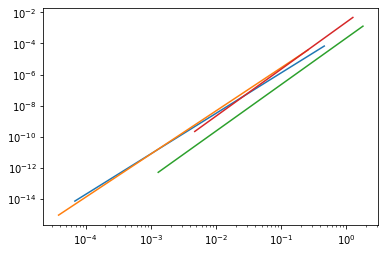

In [34]:
import matplotlib.pyplot as plt
def newtown_n2_modified(f, f_prime, f_double_prime, x, tol):
    """An implementation of the 'double' Netwon-Raphson method for finding roots of a differentiable function.
    
    Arguments:
        f: the lambda function for the differentiable function we want to find the roots for
        f_prime: hand-calculated derivative of f
        f_double_prime: hand-calculated derivative of f
        x: initial approximation for the root
        tol: the tolerance
        
    Returns:
        An estimate for the root of the function.
    """
    x = (-f_prime(x) + math.sqrt((f_prime(x))**2 -2*(f(x))*(f_double_prime(x))) + f_double_prime(x)* x) / f_double_prime(x)
    store = []
    while abs(f(x)) > tol:
        x = (-f_prime(x) + math.sqrt((f_prime(x))**2 -2*(f(x))*(f_double_prime(x))) + f_double_prime(x)* x) / f_double_prime(x)
        store.append(abs(f(x)))
    return(store)

f = lambda x: x**2 - np.cos(x) - 3*np.sin(x) - 9
f_prime = lambda x: 2*x + np.sin(x) - 3*np.cos(x)
f_double_prime = lambda x: 3*np.sin(x) + np.cos(x) + 2
x = 9
tol=1e-6
error = newtown_n2_modified(f, f_prime, f_double_prime, x, tol)
plt.loglog(error[:-1],error[1:]) # blue line

x = 7
h = lambda x: np.sin(x) + x**2 - 2 * np.log(x) - 5
h_prime = lambda x: 2*x + np.cos(x) - 2/x
h_double_prime = lambda x: -np.sin(x) + 2 + 2/x**2
tol = tol=1e-6
error = newtown_n2_modified(h, h_prime, h_double_prime, x, tol) 
plt.loglog(error[:-1],error[1:]) # orange line 

m = lambda x: (-1)*2*np.sin(x) - 5 + 3*x**2 - 2*np.cos(x) 
m_prime = lambda x: 6*x - 2*np.cos(x) + 2*np.sin(x)
m_double_prime = lambda x: 6 + 2*np.sin(x) + 2*np.cos(x)
x = 9
tol=1e-6
error = newtown_n2_modified(m, m_prime, m_double_prime, x, tol) 
plt.loglog(error[:-1],error[1:]) # green line

x = 1
m = lambda x: x**8 + x**7 - 8*x**6 + 9*np.sin(x)
m_prime = lambda x: 8*x**7 + 7*x**6 - 48*x**5 + 9*np.cos(x)
m_double_prime = lambda x: 56*x**6 + 42*x**5 - 240*x**4 - 9*np.sin(x)
tol=1e-6
error = newtown_n2_modified(m, m_prime, m_double_prime, x, tol) 
plt.loglog(error[:-1],error[1:]) # red line

### d)
What are the pro’s and con’s to using this new method?

***The pro's of using this method is that it is very efficient and accurate when finding positive roots. It takes less iterations to converge at the value within the tolerance. That said, a major con is that not all functions can be evaluated with this method. Functions are limited to those that are twice differentiable. Moreover, the guess value (i.e. "x") needs to be within a certain domain, or else the function will throw an error.***

## Exercise 2.61

An object falling vertically through the air is subject to friction due to air resistance as well as gravity. The function describing the position of such a function is
$$s(t) = s_0 - \frac{mg}{k}t + \frac{m^2g}{k^2}\left(1-e^{\frac{-kt}{m}}\right)$$
where $m$ is the mass measured in kg, $g$ is gravity measured in meters per second per second, $s_0$ is the initial position measured in meters, and $k$ is the coefficient of air resistance.

### a)
What are the units of the parameter $k$?

***The units for k are : kg/s.***

### b)
If $m = 1$ kg, $g = 9.8 m/s^2$, $k = 0.1$ and $s_0 = 100$m, how long will it take for the object to hit the ground? Find your answer to within 0.01 seconds.

***It will take the object approximately 4.88 seconds to hit the ground.***

In [37]:
def newtown_n2_modified_v2(f, f_prime, f_double_prime, x, tol):
    """An implementation of the 'double' Netwon-Raphson method for finding roots of a differentiable function.
    
    Arguments:
        f: the lambda function for the differentiable function we want to find the roots for
        f_prime: hand-calculated derivative of f
        f_double_prime: hand-calculated derivative of f
        x: initial approximation for the root
        tol: the tolerance
        
    Returns:
        An estimate for the root of the function.
    """
    x = (-f_prime(x) - math.sqrt((f_prime(x))**2 -2*(f(x))*(f_double_prime(x))) + f_double_prime(x)* x) / f_double_prime(x)
    while abs(f(x)) > tol:
        x = (-f_prime(x) - math.sqrt((f_prime(x))**2 -2*(f(x))*(f_double_prime(x))) + f_double_prime(x)* x) / f_double_prime(x)
    return(x)

f = lambda x: 100 - (1*9.8)/0.1 * x + (1**2*9.8)/0.1**2 * (1-np.exp((-0.1*x)/1))
f_prime = lambda x: 98*np.exp(-x/10) - 98
f_double_prime = lambda x: -(49*np.exp(-x/10))/5
x = 5
tol=1e-6

newtown_n2_modified_v2(f, f_prime, f_double_prime, x, tol)

m(x) = x^8 + x^7 - 8*x^6 + 9*sin(x);  1.0491850546952968


### c)
The value of $k$ depends on the aerodynamics of the object and might be challenging to measure. We want to perform a sensitivity analysis on your answer to part (b) subject to small measurement errors in $k$. If the value of $k$ is only known to within 10% then what are your estimates of when the object will hit the ground?



***The object may reach the ground between 4.85 to 4.92 seconds.***

In [10]:
f = lambda x: 100 - (1*9.8)/0.11 * x + (1**2*9.8)/0.11**2 * (1-np.exp((-0.11*x)/1))
f_prime = lambda x: 98*np.exp(-x/10) - 98
f_double_prime = lambda x: -(49*np.exp(-x/10))/5
x = 5
tol=1e-6

print(newtown_n2_modified_v2(f, f_prime, f_double_prime, x, tol))

f = lambda x: 100 - (1*9.8)/0.09 * x + (1**2*9.8)/0.09**2 * (1-np.exp((-0.09*x)/1))
f_prime = lambda x: 98*np.exp(-x/10) - 98
f_double_prime = lambda x: -(49*np.exp(-x/10))/5
x = 5
tol=1e-6

print(newtown_n2_modified_v2(f, f_prime, f_double_prime, x, tol))

4.924783822156885
4.8455553606125505


## Exercise 2.65



The `scipy` library in Python has many built-in numerical analysis routines much like the ones that we have built in this chapter. Of particular interest to the task of root finding is the `fsolve` command in the `scipy.optimize` library.

Go to the [help documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html) for `scipy.optimize.fsolve` and make yourself familiar with how to use the tool.

### a)
First solve the equation $xsin(x) - ln(x) = 0$ for $x$ starting at $x_0 = 3$. Show work here if necessary.

In [11]:
# Estimate of x at x0 = 3. Solved using the newton_n2 (modified) method. 
f = lambda x: x*np.sin(x) - np.log(x)
f_prime = lambda x: x*np.cos(x) + np.sin(x) - 1/x
f_double_prime = lambda x: -x*np.sin(x) + 2*np.cos(x) + x**(-2)
x = 3
tol = 1e-6

print(newtown_n2_modified_v2(f, f_prime, f_double_prime, x, tol))

2.7649217507755646


   #### (i)
Make a plot of the function on the domain $[0, 5]$ so you can eyeball the root before using the tool.

/var/folders/sx/gw6n5mnj28x21kcmksnp_p240000gn/T/ipykernel_729/641972817.py:2: RuntimeWarning: divide by zero encountered in log
  y = x*np.sin(x) - np.log(x)


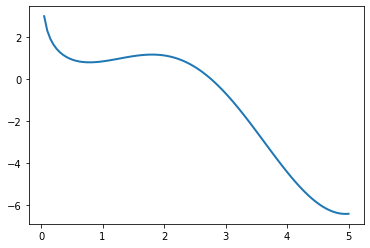

In [12]:
x = np.linspace(0,5, 100)
y = x*np.sin(x) - np.log(x)
plt.plot(x, y, linewidth = 2.0)

#### ii)
Use the `scipy.optimize.fsolve()` command to approximate the root.

In [13]:
from scipy.optimize import fsolve
f = lambda x: x*np.sin(x) - np.log(x)

fsolve(f, 3)[0]

2.7649217502367387

#### iii)
Fully explain each of the outputs from the `scipy.optimize.fsolve()` command. You should use the `fsolve()` command with `full_output=1` so you can see all of the solver diagnostics.

***EXPLAIN `fsolve()`'s OUTPUT HERE: The first element (i.e. array([2.76492175])) is the output value of the fsolve function that approximates the value of x to satisfy the input function. Next there is a dictionary type element that contains all the solver diagnostics. The first of the metrics is "nfev", which is the number of function calls it took to output the value within a certain degree of accuracy. The next metric is "fjac", which is column-wise orthogonal matrix created through QR factorizatioin of the final approximate Jacobian matrix. The next metric is "r", which is the upper triangular matrix created by QR factorization of the same matrix. The next metric is "qtf", which is the vector of "fvec" multiplied by the transpose of the orthogonal matrix (q). The final metric is "fvec", which is the function evaluated at the output (i.e. the output's error from the actual value). After the dictionary of optional return values, is the integer flag, indicating whether or not a solution was found (i.e. since the value return was 1, this confirms that fsolve() found a solution). The output concludes with a message that confirms that the solution converged and was found.***

In [14]:
f = lambda x: x*np.sin(x) - np.log(x)
fsolve(f, 3, full_output = 1)

(array([2.76492175]),
 {'nfev': 8,
  'fjac': array([[-1.]]),
  'r': array([2.56493214]),
  'qtf': array([1.10844667e-12]),
  'fvec': array([-2.22044605e-16])},
 1,
 'The solution converged.')

### b)
Demonstrate how to use `fsolve()` using any non-trivial nonlinear equation solving problem.   
Demonstrate what some of the options of `fsolve()` do.

In [15]:
f = lambda x: x**2 - 2
f_prime = lambda x: 2*x
print(fsolve(f, 3))
print(fsolve(f, 3, fprime = f_prime))
print(fsolve(f, 3, col_deriv = 1))
print(fsolve(f, 3, xtol = 1*10**(-6)))
print(fsolve(f, 3, maxfev = 100))

[1.41421356]
[1.41421356]
[1.41421356]
[1.41421356]
[1.41421356]


### c)
The `scipy.optimize.fsolve()` command can also solve systems of equations (something we have not built algorithms for in this chapter).   
Consider the system of equations $F(x)$:
$$x_0\cos(x_1) = 4 \\ x_0x_1 - x_1 = 5$$
The following Python code allows you to use `scipy.optimize.fsolve()` to solve this system of nonlinear equations in much the same way as we did in part (a) of this problem. However, be aware that we need to think of `x` as a vector of $x$-values. Go through the code below and **be sure that you understand every line of code**.

In [16]:
import numpy as np
from scipy.optimize import fsolve

'''
def F(x):
  Output = [ x[0]*np.cos(x[1])-4 ]
  Output.append( x[0]*x[1] - x[1] - 5 )
  return Output
'''

# Or alternately we could define the system as a lambda function 
F = lambda x: [ x[0]*np.cos(x[1])-4 , x[0]*x[1]-x[1]-5 ]

fsolve(F,[6,1],full_output=1) 
# Note: full_output gives the solver diagnostics

(array([6.50409711, 0.90841421]),
 {'nfev': 9,
  'fjac': array([[-0.55345957, -0.83287605],
         [ 0.83287605, -0.55345957]]),
  'r': array([-1.10094528, -1.74086798, -7.30631345]),
  'qtf': array([-4.69149498e-10, -1.12803701e-09]),
  'fvec': array([ 3.73034936e-14, -5.41788836e-14])},
 1,
 'The solution converged.')

### d)
Solve the system of nonlinear equations below using `.fsolve()`.  
System of equations $G(x)$:
$$x^2 - xy^2 = 2 \\ xy = 2$$

In [94]:
F = lambda x: [x[0]**2 - x[0]*x[1]**2 - 2, x[0]*x[1] - 2]
fsolve(F, [2, 1] , full_output = 1)

(array([2., 1.]),
 {'nfev': 4, 'fjac': array([[-0.9486833 , -0.31622776],
         [ 0.31622776, -0.9486833 ]]), 'r': array([-3.16227769,  3.1622777 , -3.16227766]), 'qtf': array([0., 0.]), 'fvec': array([0., 0.])},
 1,
 'The solution converged.')